# Portfolio Analysis


In [1]:
from analyze import analyze
import matplotlib.pyplot as plt

config = {
    'initial_capital': 10000.0,
    'start_date': '2024-01-01',
    'end_date': '2024-12-31',
    'portfolios': [
        {
            'name': 'Test Portfolio 1',
            'settings_history': {
                '2024-01-01': {
                    'auto_rebalance': 'monthly',
                    'MSTR': 0.5,
                    'TLT': 0.5,
                },
            },
        },
        {
            'name': 'Test Portfolio 2',
            'settings_history': {
                '2024-01-01': {
                    'auto_rebalance': 'none',
                    'MSTR': 0.5,
                    'TLT': 0.5,
                },
            },
        },
    ],
}


results = analyze(config)


In [2]:
print(
    results['stats_df'].to_string(
        index=False,
        formatters={
            'total_return': '{:.2%}'.format,
            'maxdd': '{:.2%}'.format,
            'sharpe': '{:.2f}'.format,
            'score': '{:.0f}'.format,
        },
    )
)
print(f'\nWinner: {results["winner"]}')

       portfolio total_return   maxdd sharpe  rebalances score
Test Portfolio 1      155.67% -27.55%   1.90          12    21
Test Portfolio 2      167.08% -34.84%   1.67           1     7

Winner: Test Portfolio 1


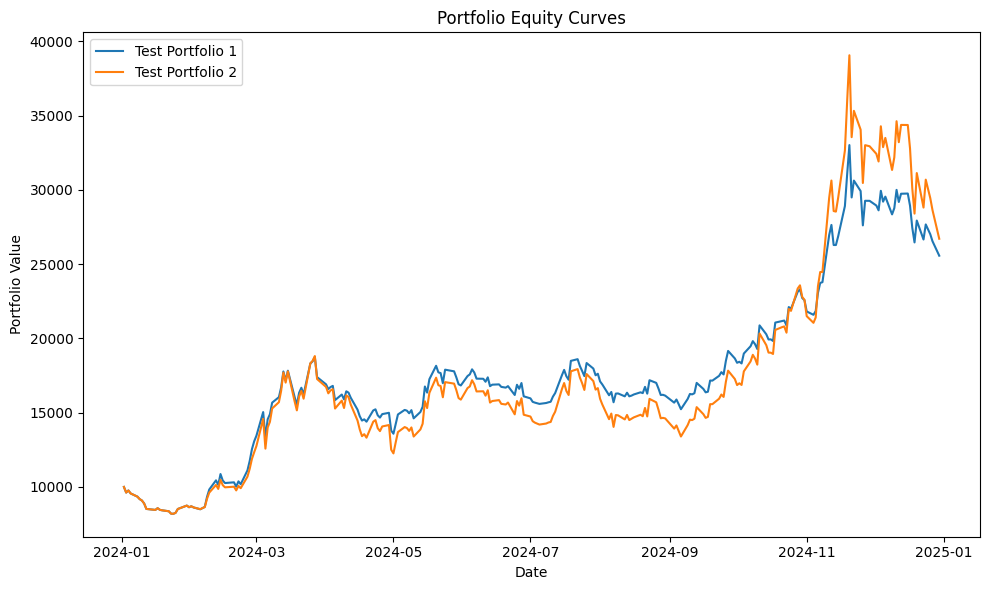

In [3]:
# Plot the backtested daily equity curves for all portfolios
plt.figure(figsize=(10, 6))
for name in results['results_df'].columns:
    plt.plot(results['results_df'].index, results['results_df'][name], label=name)
plt.title('Portfolio Equity Curves')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.tight_layout()
plt.show()

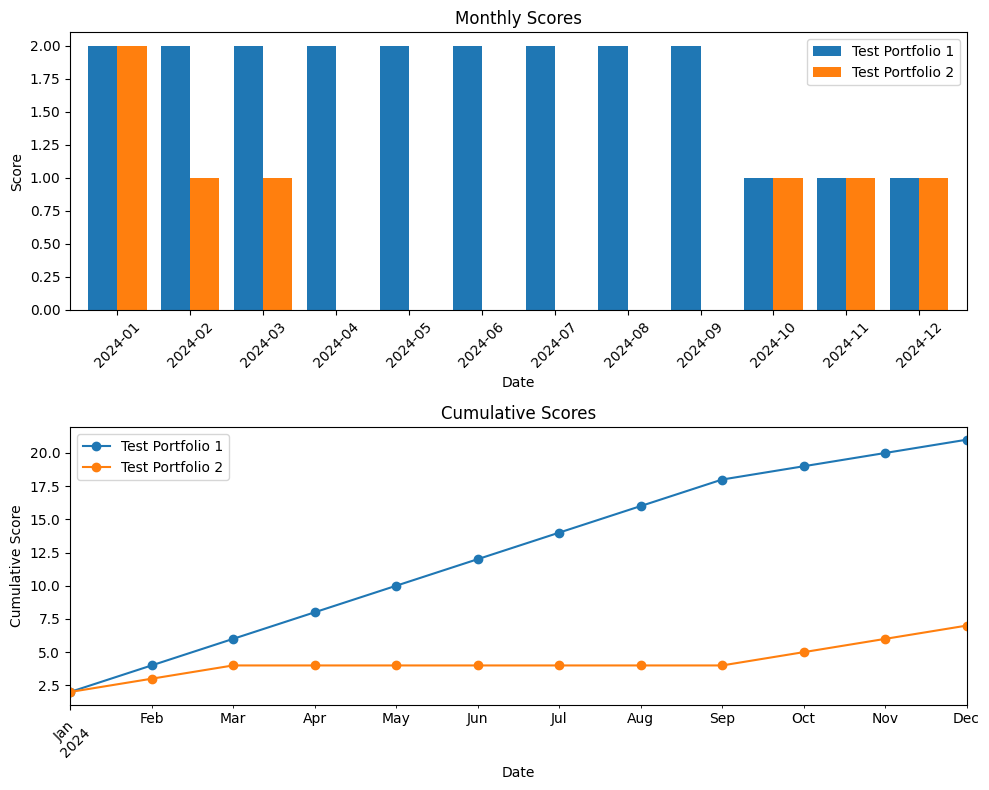

In [7]:
# Plot the monthly scores and cumulative scores
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Monthly scores bar chart
results['monthly_scores_df'].plot(kind='bar', width=0.8, ax=ax1)
ax1.set_title('Monthly Scores')
ax1.set_xlabel('Date')
ax1.set_ylabel('Score')
ax1.tick_params(axis='x', rotation=45)

# Cumulative scores line chart
cumulative_scores = results['monthly_scores_df'].cumsum()
cumulative_scores.plot(ax=ax2, marker='o')
ax2.set_title('Cumulative Scores')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()